### workflow examples for memo_py

Possible example workflows of the framework are outlined below. The workflows are categorised into the sections

- A Networks and Simulations
    - A1 define a network
    - A2 simulate a network by the Gillespie algorithm
    - A3 simulate a network by the moment-based algorithm
- B Data handling
    - B1 load mean, variance and covariance data
    - B2 create *in silico* count data and transform to mean, variance and covariance (including bootstrapping)
- C Parameter and Model Evidence Estimation
    - C1 fit a model to example data (the model to its own in silico data)
    - C2 fit a selection of models to the *in silico* data
    - C3 fit a selection of models to the example data

to explain the different functionalities of this framework.

In [1]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import corner
%matplotlib inline

#### A Networks and Simulations

#### A1 define a network

In [2]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 1}
        ]

### computation
net = me.Network('net_1')
net.structure(topology_1)

print(net.net_name)
print(net.net_modules)

net_1
[{'module': 'module_0', 'start-end': ('X_t', 'Y_t'), 'start-end_ident': ('Z_0', 'Z_1'), 'sym_rate': 'd_01', 'sym_rate_ident': 'theta_0', 'type': 'S -> E', 'module_steps': 1}, {'module': 'module_1', 'start-end': ('Y_t', 'Y_t'), 'start-end_ident': ('Z_1', 'Z_1'), 'sym_rate': 'la_1', 'sym_rate_ident': 'theta_1', 'type': 'S -> S + S', 'module_steps': 1}]


#### A2 simulate a network by the Gillespie algorithm

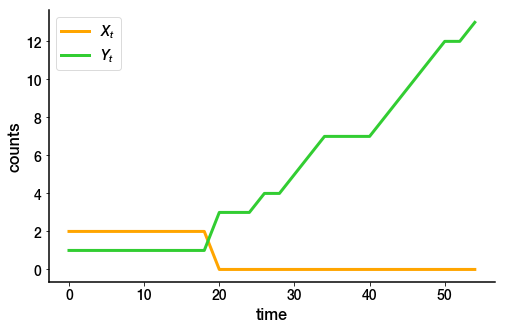

In [3]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]


initial_values = {'X_t': 2, 'Y_t': 1}
theta_values = {'la_1': 0.06, 'd_01': 0.04}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)

### computation
net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('gillespie', initial_values, theta_values, time_values)

### plotting
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': '$Y_t$', 'color': 'limegreen'},
    'X_t': {'label': '$X_t$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_counts'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_counts(settings), output)

#### A3 simulate a network by the moment-based algorithm

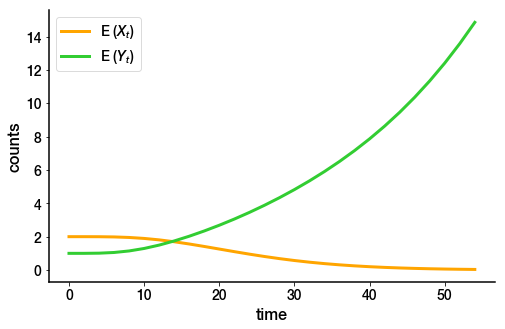

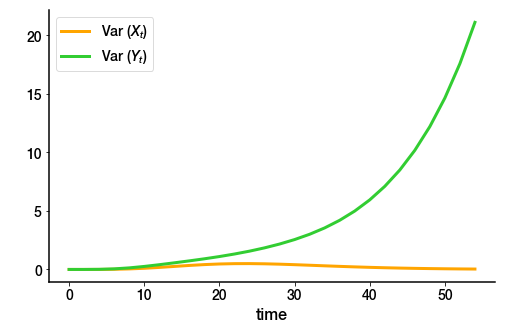

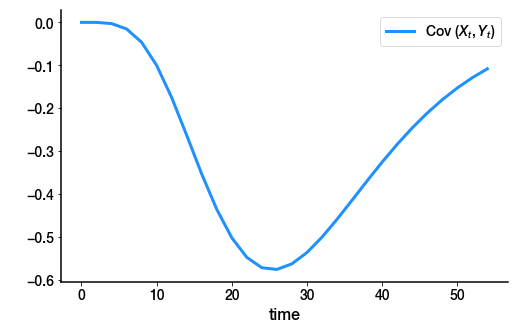

In [4]:
### input
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 2.0, 'Y_t': 1.0}
theta_values = {'la_1': 0.06, 'd_01': 0.04}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)

### computation
net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_mean'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_var'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'line_evolv_cov'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_covariance(settings), output)


#### A4 derive the symbolic moment equations for a defined network

#### B Data handling

#### B1 load mean, variance and covariance data

['Y_t', 'X_t']


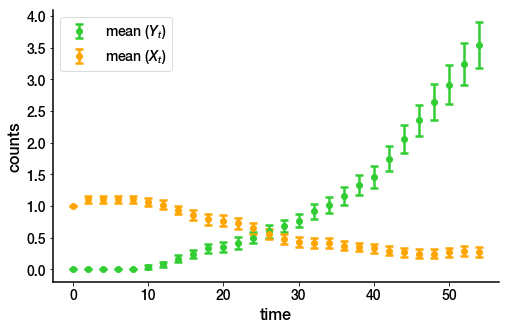

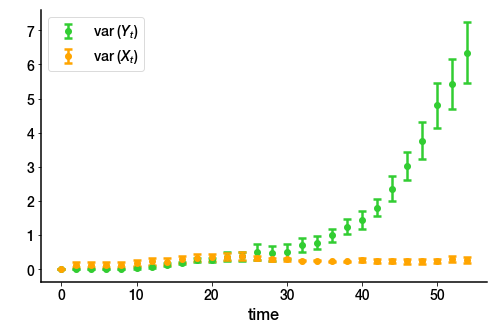

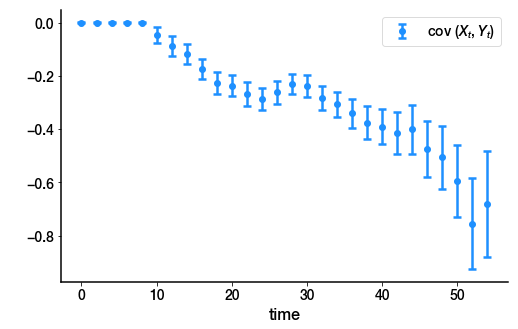

In [6]:
### load predefined data set with pickle
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14.pickle', 'rb'))
print(data)
print(data.data_variables)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'mean $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'mean $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_mean'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_var'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('X_t', 'Y_t'): {'label': 'cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'dots_w_bars_evolv_cov'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_covariance(settings), output)


#### B2 load count data and transform to mean, variance and covariance (including bootstrapping)

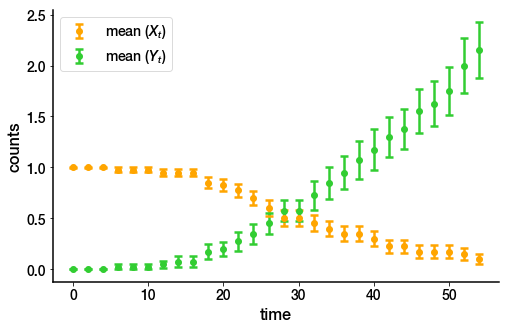

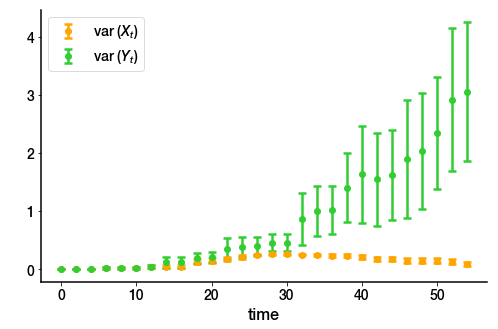

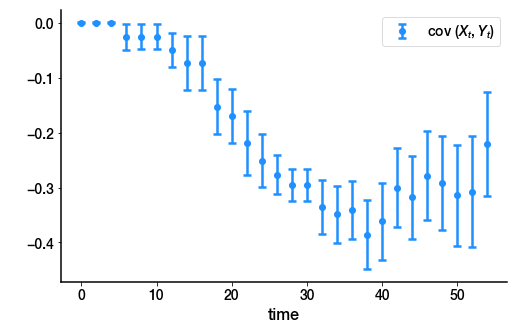

In [8]:
### run simulations to obtain in silico counts
num_iter = 40

topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 1, 'Y_t': 0}
theta_values = {'la_1': 0.055, 'd_01': 0.030}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', initial_values, theta_values, time_values)[1])

in_silico_counts = np.array(res_list)

### creation of a new data object
data_name = 'data_in_silico'

data_input = {
    # general settings
    'variables': ['X_t', 'Y_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': time_values, # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': in_silico_counts, # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 100000, # 100000
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.001
}


data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'mean $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'mean $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_mean'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_var'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('X_t', 'Y_t'): {'label': 'cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_dots_w_bars_evolv_cov'}
        
im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars_evolv(*data.dots_w_bars_evolv_covariance(settings), output)

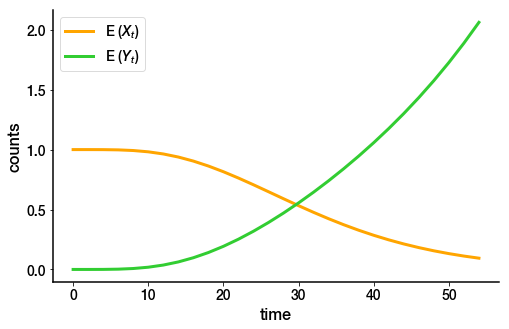

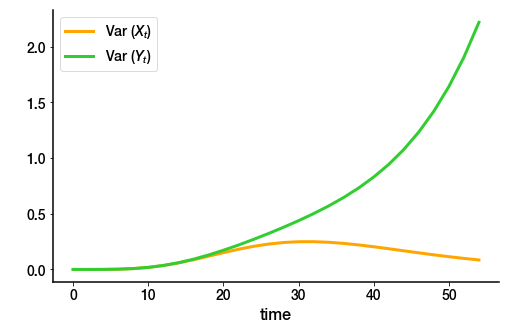

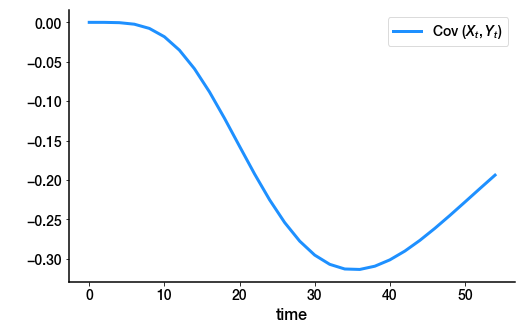

In [9]:
### compare to exact moments

topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'X_t': 1.0, 'Y_t': 0.0}
theta_values = {'la_1': 0.055, 'd_01': 0.030}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values)

# plotting
# mean
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'counts',
        'limits': (None, None),
        'log': False}

settings = {
    'Y_t': {'label': 'E $(Y_t)$', 'color': 'limegreen'},
    'X_t': {'label': 'E $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_mean'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_mean(settings), output)

# var
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'Y_t'): {'label': 'Var $(Y_t)$', 'color': 'limegreen'},
    ('X_t', 'X_t'): {'label': 'Var $(X_t)$', 'color': 'orange'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_var'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_variance(settings), output)

# cov
x_axis = {'label': 'time',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}

settings = {
    ('Y_t', 'X_t'): {'label': 'Cov $(X_t, Y_t)$', 'color': 'dodgerblue'}
}

output = {'output_folder': './example_figures',
        'plot_name': 'in_silico_line_evolv_cov'}

im = me.Plots(x_axis, y_axis, show=True)
im.line_evolv(*sim.line_evolv_covariance(settings), output)

In [11]:
### store python object of the in silico data with pickle
with open('in_silico_data.pickle', 'wb') as file_:
    pickle.dump(data, file_)

#### B3 simulate moments of a network and load as *in silico* data

#### C Parameter and Model Evidence Estimation

#### C1 fit a model to example data (the model to its own *in silico* data)

In [3]:
### list of models (just one here)
topology_1 = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

setup_1 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}}
    
#topology_2 = [
#        {'start': 'Y_t', 'end': 'X_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 3},
#        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 3}
#        ]
#setup_2 = {'initial_values': {'X_t': 0.0, 'Y_t': 1.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}}

list_models = [
    [('net_1'), (topology_1), (setup_1)]# ,
    # [('net_2'), (topology_2), (setup_2)]
]

### load the in silico data from section B
data = pickle.load(open('in_silico_data.pickle', 'rb'))
print(data)
print(data.data_name)

### input for selection
d = {
# model set
'model_set': list_models,

# data/model settings
'data': data,
'mean_only': False, # True or False

# mcmc settings
'burn_in_steps':                20, # 200, 500, 1000, 2000
'sampling_steps':               20, # 150, 500, 500
'num_temps':                    5, # 5
'num_walkers':                  64 # 64, 100, 200, 400
}

### computation, result is a list of Estimation class instances
res = me.select_models(d)

data_in_silico
initialise estimation ...
check order 1
check order 2
run estimation ...
   burn in ...
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
   sampling ...
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
   finalise ...
results:

        	 theta confidence: ((0.030194322257351226, 0.02956968708049441, 0.03079499169201769), (0.06116699251434725, 0.05789922589677986, 0.06419198062707127))

        	 theta medians: [0.03019432 0.06116699]

        	 log evidence: 279.01874054211805

        	 log evidence error: 3.13307819346835
net_1 done


In [4]:
### save in silico estimation with pickle

with open('in_silico_estimation.pickle', 'wb') as file_:
    pickle.dump(res, file_)

In [2]:
res = pickle.load(open('in_silico_estimation.pickle', 'rb'))

print(res)

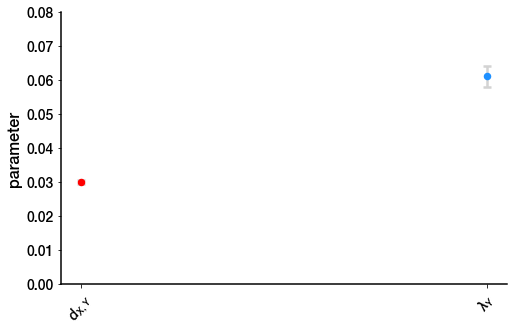

((0.030194322257351226, 0.02956968708049441, 0.03079499169201769), (0.06116699251434725, 0.05789922589677986, 0.06419198062707127))


In [3]:
est = res[0]

### plot one-dimensional parameter confidence bounds
x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'parameter',
        'limits': (0, 0.08),
        'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_dots_bars_params_conf'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars(*est.dots_w_bars_parameters(settings), output)
print(est.bay_est_params_conf)

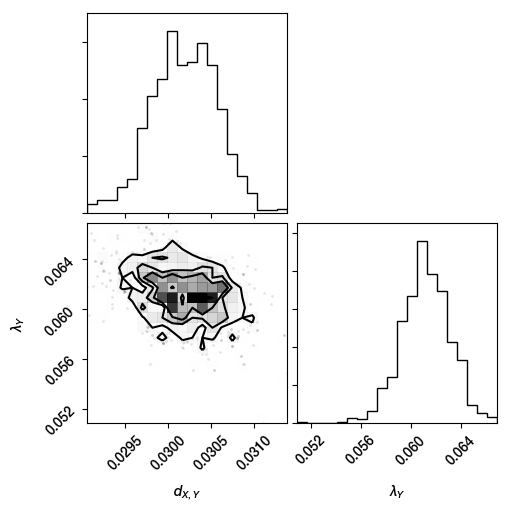

In [4]:
x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'parameter',
        'limits': (0, 0.08),
        'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_corner'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_corner(*est.samples_corner_parameters(settings), output)


#corner.corner(res[0].bay_est_samples_temp1, labels=['theta_0 (d_01)', 'theta_1 (la_1)'])

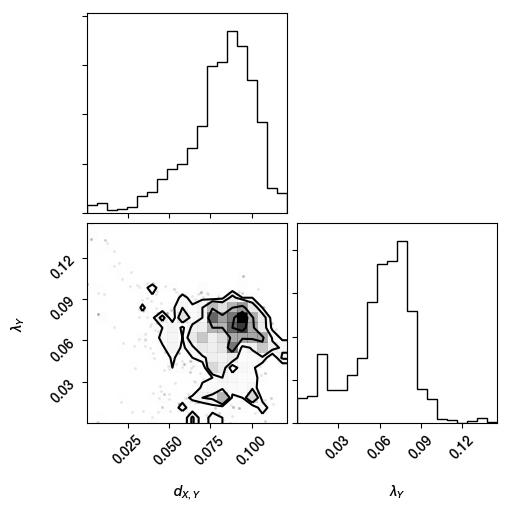

In [5]:
temperature_ind = 4

x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'parameter',
        'limits': (0, 0.08),
        'log': False}

settings = {
    'la_1': {'label': '$\lambda_Y$', 'color': 'dodgerblue'},
    'd_01': {'label': '$d_{X,Y}$', 'color': 'red'}
    }

output = {'output_folder': './example_figures',
        'plot_name': f'fig_test_corner_temp{temperature_ind}'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_corner(*est.samples_corner_parameters(settings, temperature_ind=temperature_ind), output)

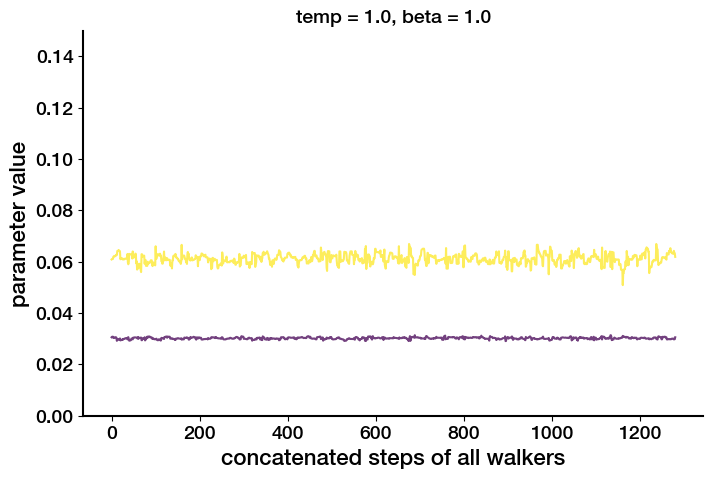

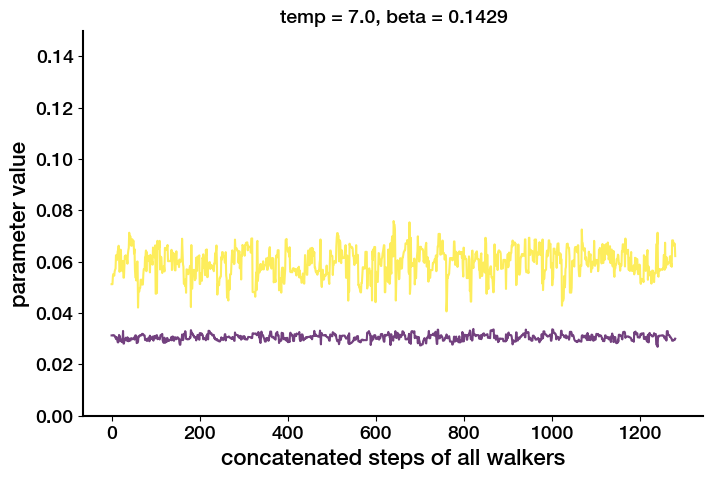

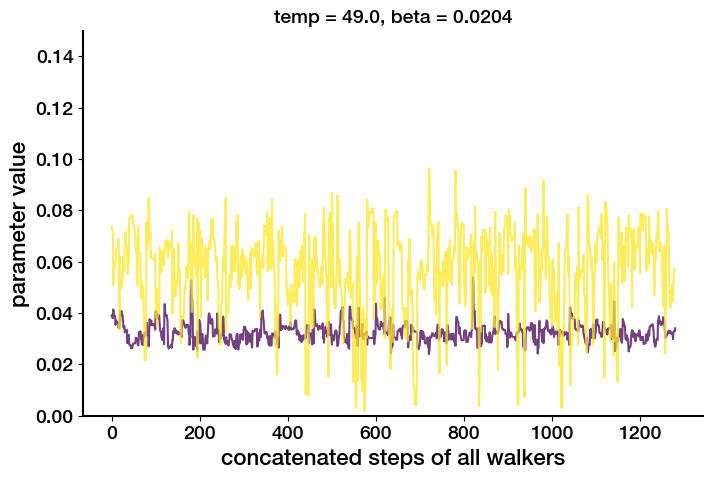

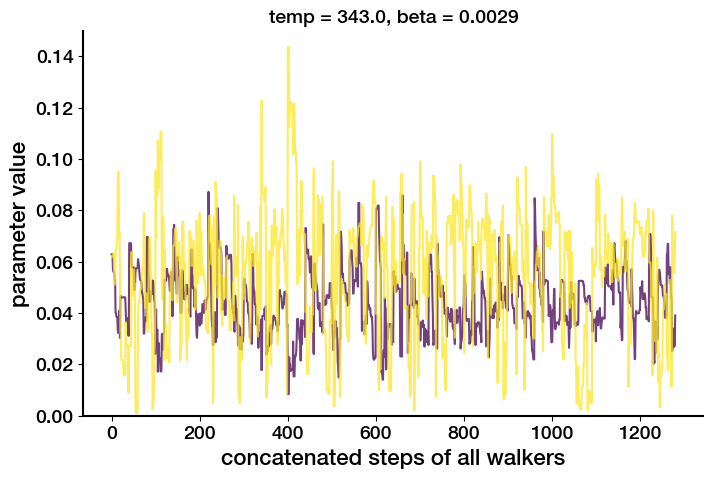

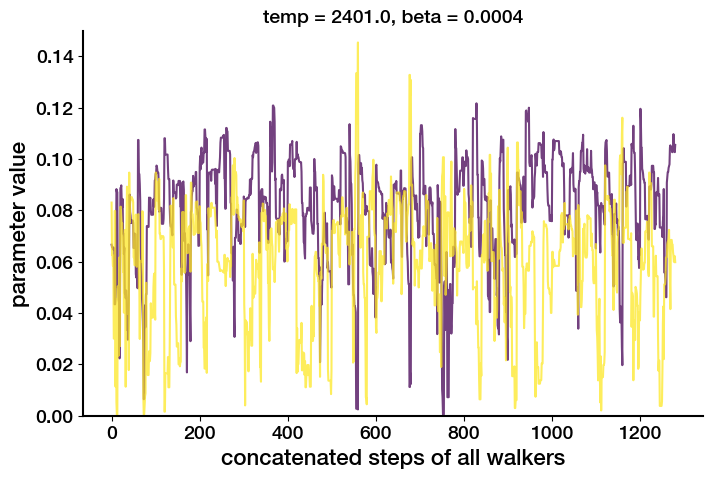

In [6]:
### chains
x_axis = {'label': ' ',
        'limits': (None, None),
        'log': False}
y_axis = {'label': ' ',
        'limits': (0.0, 0.15),
        'log': False}

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_chains'}

im = me.Plots(x_axis, y_axis, show=True)
im.samples_chains(*est.samples_chains_parameters(), output)

279.01874054211805 3.13307819346835
net_1


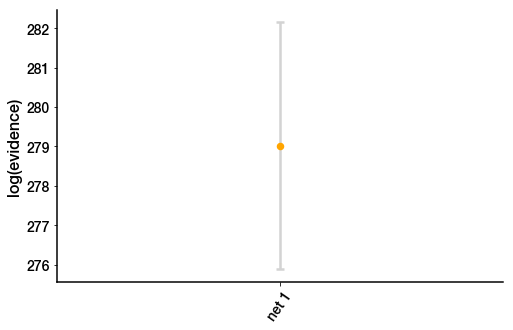

In [7]:
### log evidences of all models
model_selection = res
est = res[0]
print(est.bay_est_log_evidence, est.bay_est_log_evidence_error)
print(est.net.net_name)


x_axis = {'label': '',
        'limits': (None, None),
        'log': False}
y_axis = {'label': 'log(evidence)',
        'limits': (None, None),
        'log': False}

settings = {
    'net_1': {'label': 'net 1', 'color': 'orange'}
            }

output = {'output_folder': './example_figures',
        'plot_name': 'fig_test_dots_bars_evidence'}

im = me.Plots(x_axis, y_axis, show=True)
im.dots_w_bars(*me.selection.dots_w_bars_evidence(model_selection, settings), output)


In [ ]:
### model fits and model predictions, data optional in the background

#### C2 fit a selection of models to the *in silico* data

#### C3 fit a selection of models to the example data